## Imports

In [34]:
import numpy as np
from scipy import signal, stats
import matplotlib.pyplot as plt
from helper_functions import *

# Magic commands to autoreload py file
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading data

In [3]:
data_folder = "raw_data"

first_ecg = np.load(data_folder + "/first_ecg.npy")
first_ppg = np.load(data_folder + "/first_ppg.npy")

second_ecg = np.load(data_folder + "/second_ecg.npy")
second_ppg = np.load(data_folder + "/second_ppg.npy")

third_ecg = np.load(data_folder + "/third_ecg.npy")
third_ppg = np.load(data_folder + "/third_ppg.npy")

## 1. Sampling frequencies

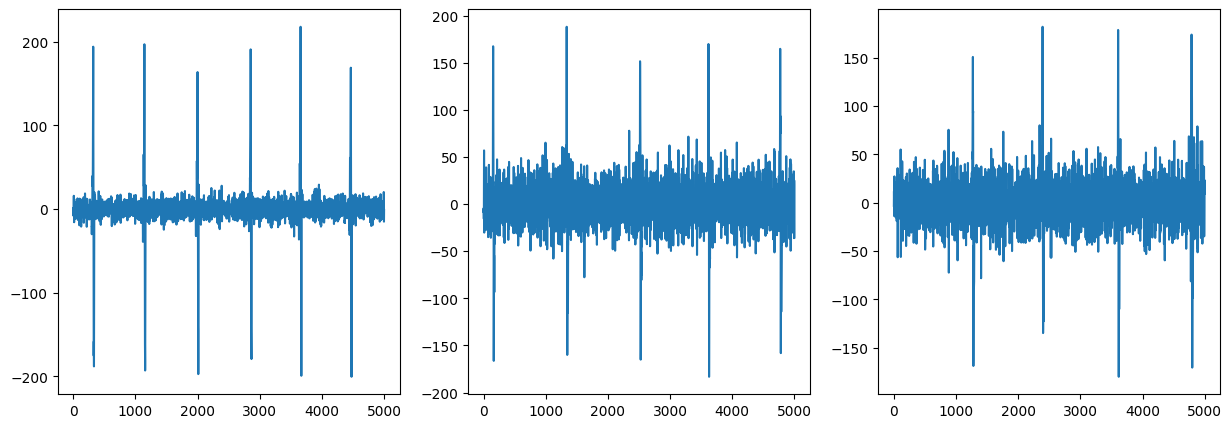

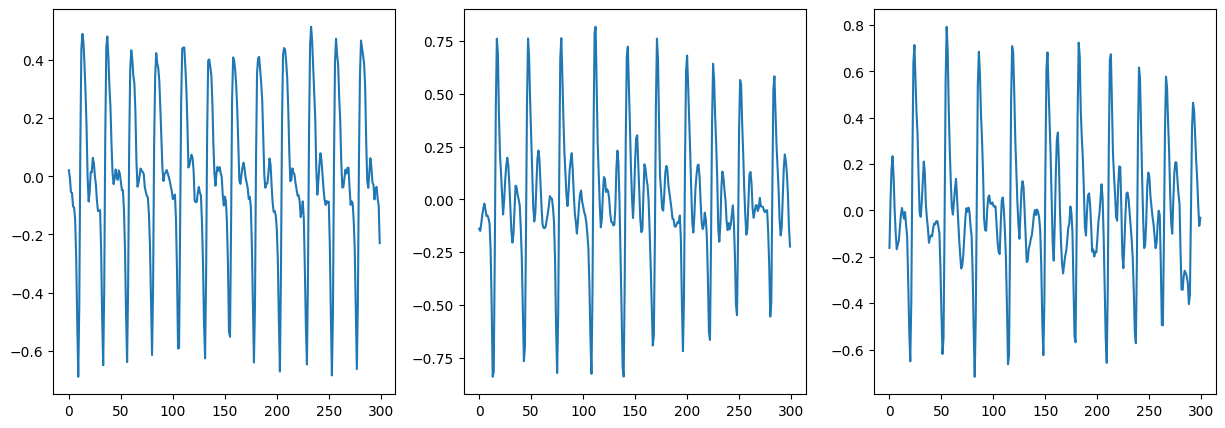

In [4]:
first_ecg_ma_detrended = simple_ma_detrending(first_ecg)
first_ppg_ma_detrended = simple_ma_detrending(first_ppg)

second_ecg_ma_detrended = simple_ma_detrending(second_ecg)
second_ppg_ma_detrended = simple_ma_detrending(second_ppg)

third_ecg_ma_detrended = simple_ma_detrending(third_ecg)
third_ppg_ma_detrended = simple_ma_detrending(third_ppg)

# Looking at specific ranges, to find a good threshold for highest-peak detection
plot_three_signals(first_ecg_ma_detrended[40000:45000], second_ecg_ma_detrended[40000:45000], third_ecg_ma_detrended[40000:45000])
plot_three_signals(first_ppg_ma_detrended[500:800], second_ppg_ma_detrended[500:800], third_ppg_ma_detrended[500:800])

In [5]:
ecg_highest_peaks_threshold = 100
ppg_highest_peaks_threshold = 0.35

# Detecting highest peaks and number of steps between them (length of one cycle) to calculate sampling frequencies
first_ecg_freq = find_frequency(first_ecg_ma_detrended, ecg_highest_peaks_threshold)
first_ppg_freq = find_frequency(first_ppg_ma_detrended, ppg_highest_peaks_threshold)

second_ecg_freq = find_frequency(second_ecg_ma_detrended, ecg_highest_peaks_threshold)
second_ppg_freq = find_frequency(second_ppg_ma_detrended, ppg_highest_peaks_threshold)

third_ecg_freq = find_frequency(third_ecg_ma_detrended, ecg_highest_peaks_threshold)
third_ppg_freq = find_frequency(third_ppg_ma_detrended, ppg_highest_peaks_threshold)

ecg_freq = np.mean([first_ecg_freq, second_ecg_freq, third_ecg_freq])
ppg_freq = np.mean([first_ppg_freq, second_ppg_freq, third_ppg_freq])

print("ECG Frequency: ", ecg_freq)
print("PPG Frequency: ", ppg_freq)

ECG Frequency:  1039.5
PPG Frequency:  20.61111111111111


## 2. Preprocess signals

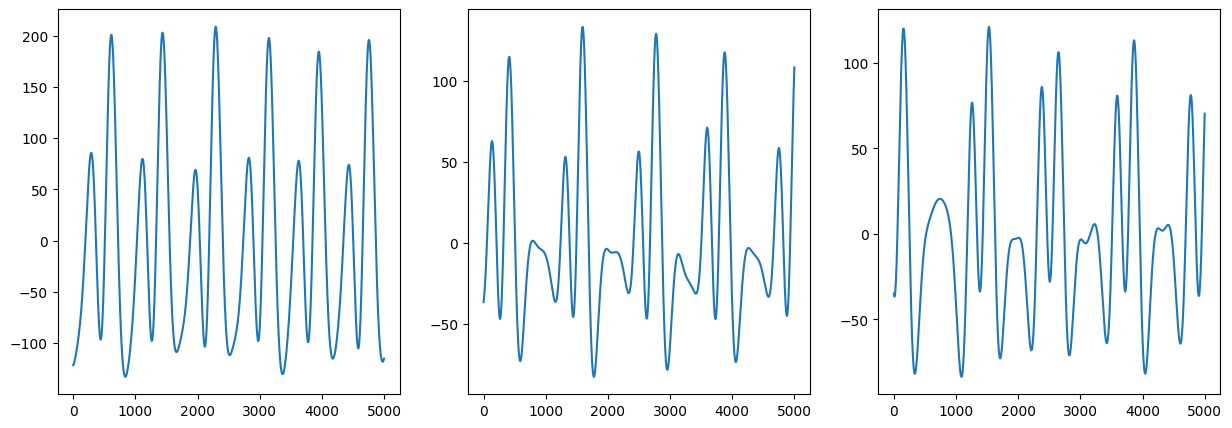

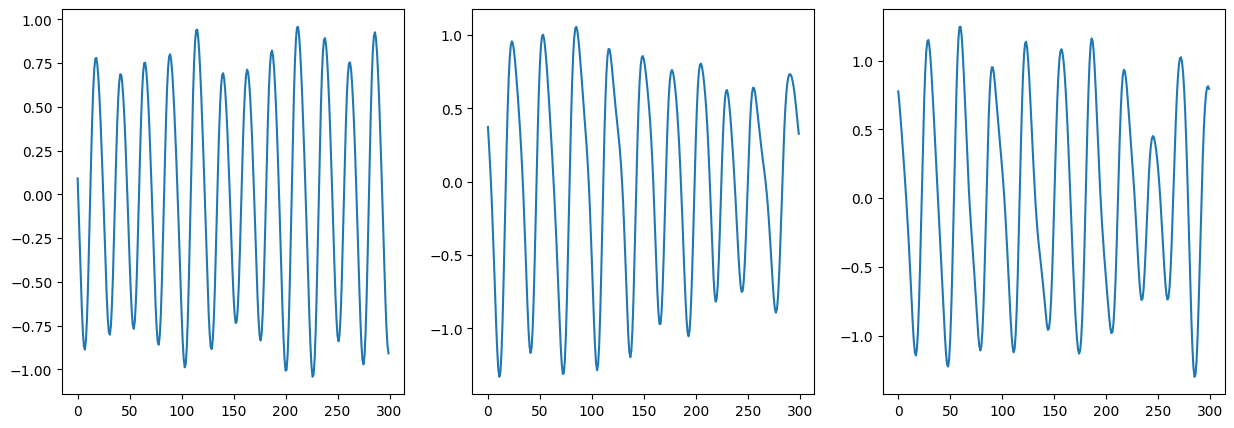

In [6]:
# ecg-finetuning
ecg_detrend_cutoff = 1
ecg_smooth_cutoff = 3.6
# ppg-finetuning
ppg_detrend_cutoff = 0.4
ppg_smooth_cutoff = 1.5

first_ecg_preprocessed = highpass_process_signal(first_ecg, sampling_rate=ecg_freq, detrend_cutoff=ecg_detrend_cutoff, smooth_cutoff=ecg_smooth_cutoff)
first_ppg_preprocessed = highpass_process_signal(first_ppg, sampling_rate=ppg_freq, detrend_cutoff=ppg_detrend_cutoff, smooth_cutoff=ppg_smooth_cutoff)

second_ecg_preprocessed = highpass_process_signal(second_ecg, sampling_rate=ecg_freq, detrend_cutoff=ecg_detrend_cutoff, smooth_cutoff=ecg_smooth_cutoff)
second_ppg_preprocessed = highpass_process_signal(second_ppg, sampling_rate=ppg_freq, detrend_cutoff=ppg_detrend_cutoff, smooth_cutoff=ppg_smooth_cutoff)

third_ecg_preprocessed = highpass_process_signal(third_ecg, sampling_rate=ecg_freq, detrend_cutoff=ecg_detrend_cutoff, smooth_cutoff=ecg_smooth_cutoff)
third_ppg_preprocessed = highpass_process_signal(third_ppg, sampling_rate=ppg_freq, detrend_cutoff=ppg_detrend_cutoff, smooth_cutoff=ppg_smooth_cutoff)


plot_three_signals(first_ecg_preprocessed[40000:45000], second_ecg_preprocessed[40000:45000], third_ecg_preprocessed[40000:45000])
plot_three_signals(first_ppg_preprocessed[500:800], second_ppg_preprocessed[500:800], third_ppg_preprocessed[500:800])

## 3. Pulse locations

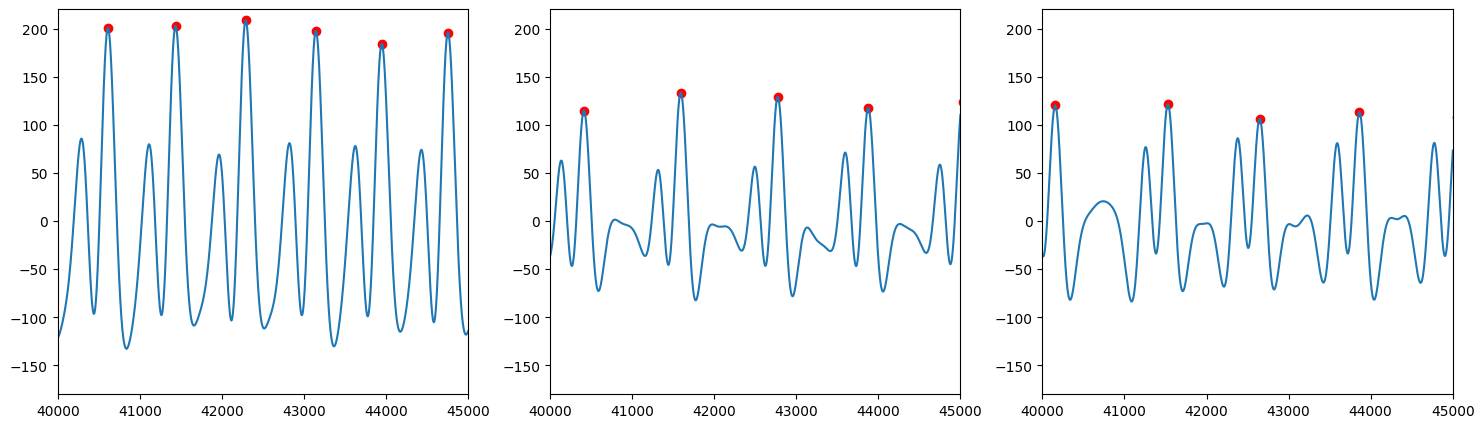

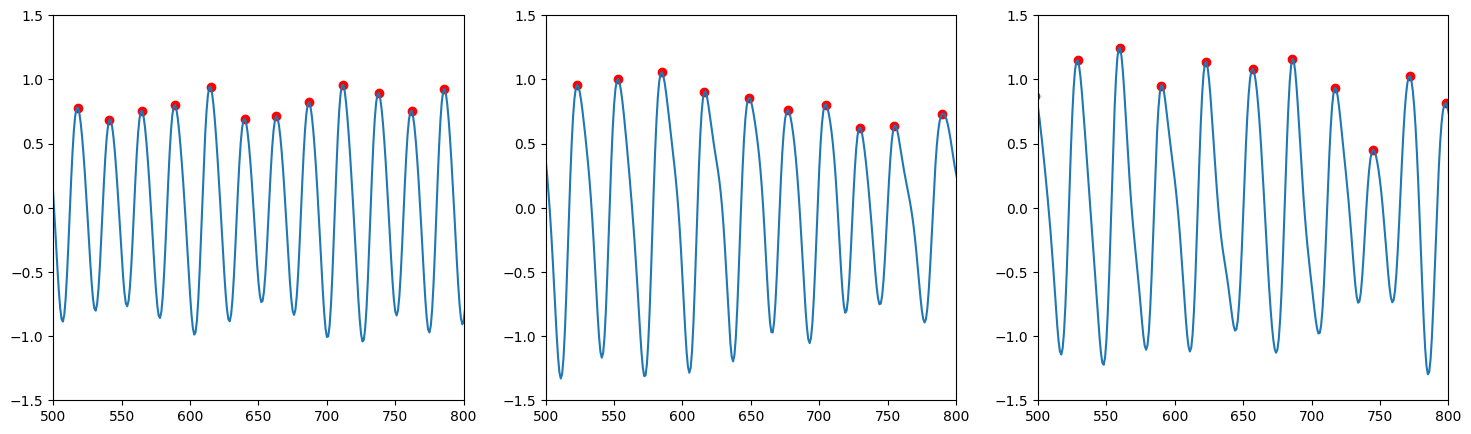

In [7]:
ecg_highest_peaks_threshold = 90
ppg_highest_peaks_threshold = 0.25

first_ecg_pulse_locations = find_pulse_locations(first_ecg_preprocessed, ecg_highest_peaks_threshold)
first_ppg_pulse_locations = find_pulse_locations(first_ppg_preprocessed, ppg_highest_peaks_threshold)

second_ecg_pulse_locations = find_pulse_locations(second_ecg_preprocessed, ecg_highest_peaks_threshold)
second_ppg_pulse_locations = find_pulse_locations(second_ppg_preprocessed, ppg_highest_peaks_threshold)

third_ecg_pulse_locations = find_pulse_locations(third_ecg_preprocessed, ecg_highest_peaks_threshold)
third_ppg_pulse_locations = find_pulse_locations(third_ppg_preprocessed, ppg_highest_peaks_threshold)


plot_signals_with_peaks(first_ecg_preprocessed,
                        second_ecg_preprocessed,
                        third_ecg_preprocessed,
                        first_ecg_pulse_locations,
                        second_ecg_pulse_locations,
                        third_ecg_pulse_locations,
                        xlim=(40000, 45000),
                        ylim=(-180, 220))
plot_signals_with_peaks(first_ppg_preprocessed,
                        second_ppg_preprocessed,
                        third_ppg_preprocessed,
                        first_ppg_pulse_locations,
                        second_ppg_pulse_locations,
                        third_ppg_pulse_locations,
                        xlim=(500, 800),
                        ylim=(-1.5, 1.5))

## 4. Anomalies and Outliers in PPG

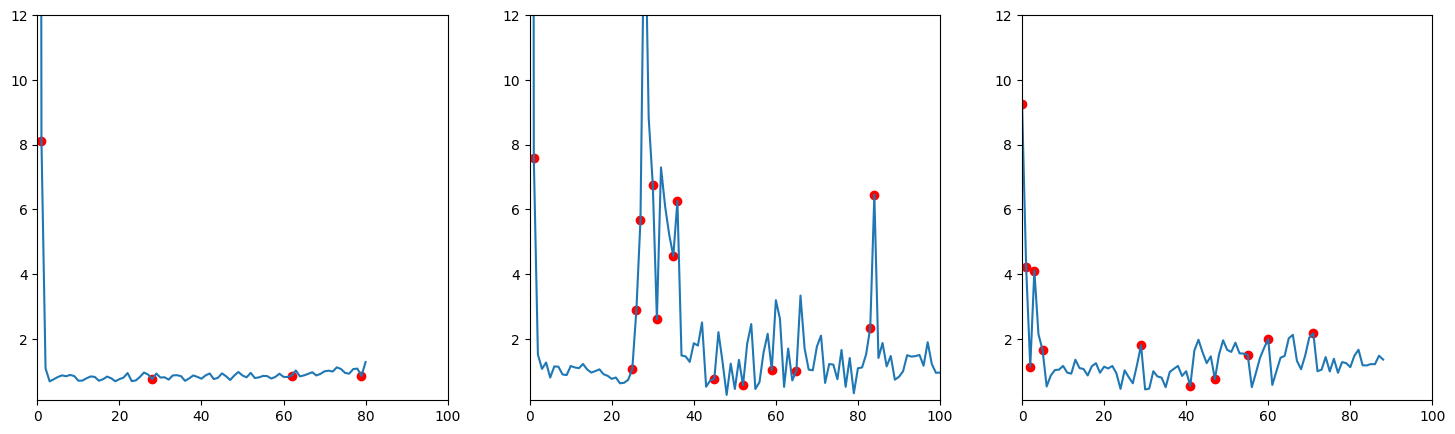

In [8]:
first_ppg_anomalies = anomaly_detection(first_ppg_preprocessed[first_ppg_pulse_locations])
second_ppg_anomalies = anomaly_detection(second_ppg_preprocessed[second_ppg_pulse_locations])
third_ppg_anomalies = anomaly_detection(third_ppg_preprocessed[third_ppg_pulse_locations])


plot_signals_with_peaks(first_ppg_preprocessed[first_ppg_pulse_locations],
                        second_ppg_preprocessed[second_ppg_pulse_locations],
                        third_ppg_preprocessed[third_ppg_pulse_locations],
                        first_ppg_anomalies,
                        second_ppg_anomalies,
                        third_ppg_anomalies,
                        xlim=(0, 100),
                        ylim=(0.1, 12))

## 5. Synchronizing the signals

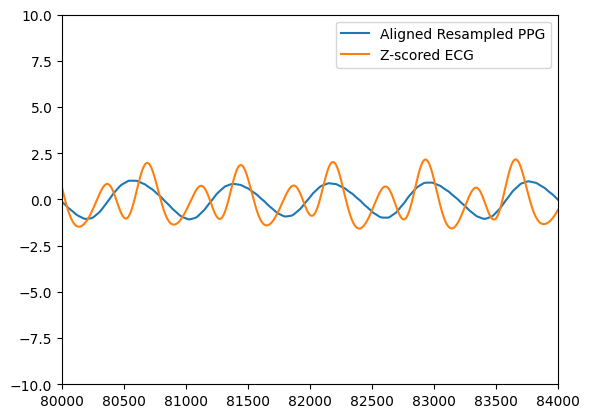

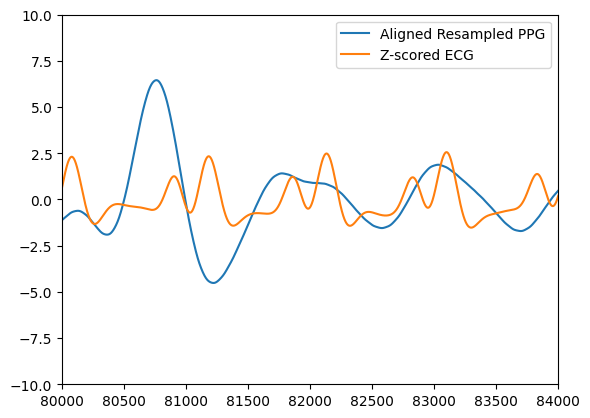

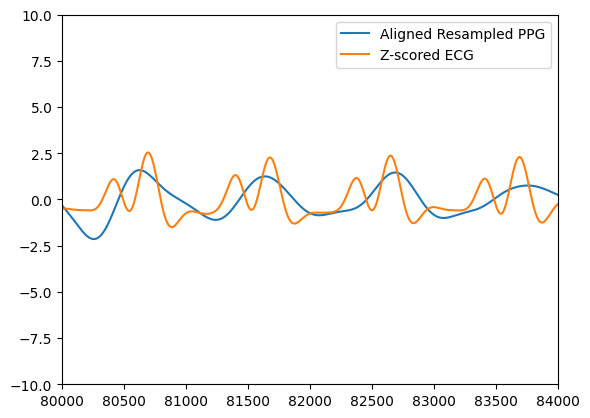

In [31]:
synched_first_ppg = synchronize_signals(first_ecg_preprocessed, first_ppg_preprocessed, first_ecg_pulse_locations, first_ppg_pulse_locations)
synched_second_ppg = synchronize_signals(second_ecg_preprocessed, second_ppg_preprocessed, second_ecg_pulse_locations, second_ppg_pulse_locations)
synched_third_ppg = synchronize_signals(third_ecg_preprocessed, third_ppg_preprocessed, third_ecg_pulse_locations, third_ppg_pulse_locations)

## 6. Best PPG signal

In [41]:
print(len(synched_first_ppg))
print(len(first_ecg_preprocessed))

print(len(synched_second_ppg))
print(len(second_ecg_preprocessed))

print(len(synched_third_ppg))
print(len(third_ecg_preprocessed))

# TODO Bring it to the same lenght (+ cut padded zeros)


# compute correlation coeff
corr_first = stats.pearsonr(synched_first_ppg, first_ecg_preprocessed)[0]
corr_second = stats.pearsonr(synched_second_ppg, second_ecg_preprocessed)[0]
corr_third = stats.pearsonr(synched_third_ppg, third_ecg_preprocessed)[0]

# Sort
value_string_pairs = [
    (corr_first, "First PPG"),
    (corr_second, "Second PPG"),
    (corr_third, "Third PPG")
]

# Sort the pairs based on the value (first element of each tuple) in descending order
sorted_pairs = sorted(value_string_pairs, key=lambda x: x[0], reverse=True)

# Print the sorted pairs
rank_counter = 1
for value, string in sorted_pairs:
    print(f"Rank {rank_counter}: {string} with {value}")
    rank_counter+=1

94551
112000
101757
114000
109000
109000
Rank 1: Second PPG with 0.2
Rank 2: Third PPG with 0.1974400413722139
Rank 3: First PPG with 0.1
